In [ ]:
import numpy as np
import pandas as pd
import os

In [ ]:
# Folder where CSV files are stored
folder_path = './source_data/'

Mounted at /content/drive


## 1. Household information

In [ ]:
# Data analysis on hhpub.xlsx file
file_path = os.path.join(folder_path, 'hhpub.csv')


df_original = pd.read_csv(file_path)
print("Shape:", df_original.shape)

display(df_original.head(5))


Shape: (129696, 58)


/tmp/ipython-input-2566174792.py:5: DtypeWarning: Columns (14,51) have mixed types. Specify dtype option on import or set low_memory=False.
  df_original = pd.read_csv(file_path)


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
0,30000007,2,3,1,3,5,7,2,1,2,...,2,187.314320,T,50,1500,750,750,20,750,300
1,30000008,5,2,1,2,4,8,1,1,2,...,2,69.513032,R,05,300,300,150,5,300,300
2,30000012,5,3,1,1,2,10,1,1,3,...,2,79.419586,C,80,17000,17000,5000,60,17000,7000
3,30000019,5,3,1,2,2,3,1,5,5,...,2,279.143588,S,40,300,300,150,50,750,300
4,30000029,3,3,1,2,2,5,2,5,1,...,2,103.240304,S,40,1500,750,750,40,1500,750


In [ ]:
# Create a working copy
df_working = df_original.copy()

print("Shape:", df_working.shape)

Shape: (129696, 58)


In [ ]:
# Keep only rows where HHSTATE is 'CA'
df_working = df_working[df_working['HHSTATE'] == 'CA']

# Count how many rows remain
row_count = len(df_working)
print(f"Number of rows where HHSTATE = 'CA': {row_count}")

# Preview first 5 rows
display(df_working.head(5))

Number of rows where HHSTATE = 'CA': 26099


,HOUSEID,TRAVDAY,SAMPSTRAT,HOMEOWN,HHSIZE,HHVEHCNT,HHFAMINC,PC,SPHONE,TAB,...,SMPLSRCE,WTHHFIN,HBHUR,HTHTNRNT,HTPPOPDN,HTRESDN,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN
6,30000041,4,3,1,2,2,11,1,1,1,...,2,788.614240,T,40,300,50,25,40,300,300
9,30000085,1,2,1,1,2,9,1,1,4,...,2,190.669041,U,50,17000,17000,5000,50,30000,17000
11,30000094,3,3,2,1,1,4,1,1,5,...,2,163.382292,T,20,300,300,150,20,300,300
19,30000155,1,1,1,1,2,-7,1,5,1,...,2,120.772451,C,30,3000,1500,1500,30,7000,1500
23,30000227,1,2,1,2,2,6,1,5,1,...,2,62.015790,S,05,3000,750,1500,5,750,300


In [ ]:
# Convert to string, strip spaces, remove leading single quote, pad with zero
df_working['HHFAMINC'] = df_working['HHFAMINC'].astype(str) \
                                .str.strip() \
                                .str.lstrip("'") \
                                .str.zfill(2)

# Check unique cleaned values
print("Unique cleaned HHFAMINC values:")
print(sorted(df_working['HHFAMINC'].unique()))


Unique cleaned HHFAMINC values:
['-7', '-8', '-9', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']


In [ ]:
# Define income code groups and descriptions
group_mapping = {
    1: {'codes': ['01','02','03','04'], 'desc': '$0 - 35,000'},
    2: {'codes': ['05','06'], 'desc': '$35,001 - 74,999'},
    3: {'codes': ['07','08'], 'desc': '$75,000 - 125,000'},
    4: {'codes': ['09','10','11'], 'desc': '$125,001 and above'}
}

# Function to assign group with formatted description
def assign_group_desc(code):
    code_str = str(code).zfill(2)  # ensure codes like 1 -> '01'
    for group_num, info in group_mapping.items():
        if code_str in info['codes']:
            return f"{group_num} ({info['desc']})"
    return 'Unknown'  # for missing or invalid codes

# Apply function to create a new column
df_working['HHFAMINC_GROUP_DESC'] = df_working['HHFAMINC'].apply(assign_group_desc)

# Check counts per group
group_counts = df_working['HHFAMINC_GROUP_DESC'].value_counts().sort_index()
print("Number of households per income group:")
display(group_counts)


Number of households per income group:


,count
HHFAMINC_GROUP_DESC,
"1 ($0 - 35,000)",6532
"2 ($35,001 - 74,999)",6860
"3 ($75,000 - 125,000)",6214
"4 ($125,001 and above)",5692
Unknown,801


In [ ]:
# First, clean the 'URBRUR' column in case it has quotes/spaces
df_working['URBRUR'] = df_working['URBRUR'].astype(str).str.strip().str.zfill(2)  # ensure '01' or '02'

# Map codes to readable labels
urb_rur_mapping = {
    '01': 'Urban',
    '02': 'Rural'
}
df_working['URBRUR_DESC'] = df_working['URBRUR'].map(urb_rur_mapping)

# Group by income group and urban/rural
grouped_counts = df_working.groupby(['HHFAMINC_GROUP_DESC', 'URBRUR_DESC']).size().unstack(fill_value=0)

print("Number of households per income group by Urban/Rural:")
display(grouped_counts)


Number of households per income group by Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",865,5667
"2 ($35,001 - 74,999)",930,5930
"3 ($75,000 - 125,000)",774,5440
"4 ($125,001 and above)",554,5138
Unknown,88,713


In [ ]:
# Group by income group and Urban/Rural, calculate average vehicles per household
avg_vehicles = df_working.groupby(['HHFAMINC_GROUP_DESC', 'URBRUR_DESC'])['HHVEHCNT'].mean().unstack(fill_value=0)

print("Average number of vehicles per household by income group and Urban/Rural:")
display(avg_vehicles.round(2))  # round to 2 decimal places for readability


Average number of vehicles per household by income group and Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",1.93,1.30
"2 ($35,001 - 74,999)",2.55,1.83
"3 ($75,000 - 125,000)",2.83,2.21
"4 ($125,001 and above)",3.25,2.43
Unknown,2.35,1.77


In [ ]:
#Rename household income colume to 'INC' and number of workers in household to 'W'
df_working = df_working.rename(columns={
    'HHFAMINC': 'INC',
    'WRKCOUNT': 'W'
})

In [ ]:
# Convert URBRUR column to numeric: Urban = 1, Rural = 0
df_working['URBRUR'] = df_working['URBRUR'].map({
    '01': 1,  # Urban
    '02': 0   # Rural
})

In [ ]:
# Column names

print(f'Number of Columns: {len(df_working.columns)}')
df_working.columns

Number of Columns: 60


Index(['HOUSEID', 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT',
       'INC', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'YOUNGCHILD', 'W', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT', 'MSASIZE',
       'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR', 'SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN',
       'HHFAMINC_GROUP_DESC', 'URBRUR_DESC'],
      dtype='object')

All we need is some of the columns.  
Therefore filtering is needed.

In [ ]:
df_working_filtered = df_working.drop(columns=[ 'TRAVDAY', 'SAMPSTRAT', 'HOMEOWN', 'PC', 'SPHONE', 'TAB', 'WALK', 'BIKE', 'CAR', 'TAXI', 'BUS',
       'TRAIN', 'PARA', 'PRICE', 'PLACE', 'WALK2SAVE', 'BIKE2SAVE', 'PTRANS',
       'HHRELATD', 'DRVRCNT', 'CNTTDHH', 'NUMADLT',
       'YOUNGCHILD', 'TDAYDATE', 'HHRESP', 'LIF_CYC', 'MSACAT', 'MSASIZE',
       'RAIL', 'URBAN', 'URBANSIZE','SCRESP', 'CENSUS_D',
       'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA', 'RESP_CNT',
       'WEBUSE17', 'SMPLSRCE', 'WTHHFIN', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN',
       'HTRESDN', 'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN'], axis=1, inplace = False)
display(df_working_filtered.head(5))

,HOUSEID,HHSIZE,HHVEHCNT,INC,HHSTATE,HHSTFIPS,W,URBRUR,HHFAMINC_GROUP_DESC,URBRUR_DESC
6,30000041,2,2,11,CA,6,2,1,"4 ($125,001 and above)",Urban
9,30000085,1,2,09,CA,6,1,1,"4 ($125,001 and above)",Urban
11,30000094,1,1,04,CA,6,1,1,"1 ($0 - 35,000)",Urban
19,30000155,1,2,-7,CA,6,1,1,Unknown,Urban
23,30000227,2,2,06,CA,6,0,1,"2 ($35,001 - 74,999)",Urban


## 2. Vehicle Information

In [ ]:
# Data analysis on vehicle information
# Path to the CSV file
file_path = os.path.join(folder_path, 'vehpub.csv')

# Read the CSV
df_vehpub = pd.read_csv(file_path)

In [ ]:
df_vehpub.columns

Index(['HOUSEID', 'VEHID', 'VEHYEAR', 'VEHAGE', 'MAKE', 'MODEL', 'FUELTYPE',
       'VEHTYPE', 'WHOMAIN', 'OD_READ', 'HFUEL', 'VEHOWNED', 'VEHOWNMO',
       'ANNMILES', 'HYBRID', 'PERSONID', 'TRAVDAY', 'HOMEOWN', 'HHSIZE',
       'HHVEHCNT', 'HHFAMINC', 'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT',
       'WRKCOUNT', 'TDAYDATE', 'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL', 'URBAN',
       'URBANSIZE', 'URBRUR', 'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE',
       'HH_HISP', 'HH_CBSA', 'SMPLSRCE', 'WTHHFIN', 'BESTMILE', 'BEST_FLG',
       'BEST_EDT', 'BEST_OUT', 'HBHUR', 'HTHTNRNT', 'HTPPOPDN', 'HTRESDN',
       'HTEEMPDN', 'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'GSYRGAL', 'GSTOTCST',
       'FEGEMPG', 'FEGEMPGA', 'GSCOST', 'FEGEMPGF'],
      dtype='object')

In [ ]:
# Create a working copy
df_vehpub_working = df_vehpub.copy()

print("Shape:", df_vehpub_working.shape)

Shape: (256115, 60)


In [ ]:
# Keep only rows where HHSTATE is 'CA'
df_vehpub_working= df_vehpub_working[df_vehpub_working['HHSTATE'] == 'CA']
del df_vehpub_working['VEHYEAR']
# Count how many rows remain
row_count = len(df_vehpub_working)
print(f"Number of rows where HHSTATE = 'CA': {row_count}")

# Preview first 5 rows
display(df_vehpub_working.head(5))

Number of rows where HHSTATE = 'CA': 52215


,HOUSEID,VEHID,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,...,HTEEMPDN,HBHTNRNT,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FEGEMPG,FEGEMPGA,GSCOST,FEGEMPGF
17,30000041,1,1,49,49046,3,1,2,1532,4,...,25,40,300,300,331.251446,947.020280,50,-9,2.858917,1
18,30000041,2,6,49,49046,3,1,1,40560,4,...,25,40,300,300,207.269346,592.565787,48,-9,2.858917,1
27,30000085,1,13,49,49482,1,4,1,145000,-1,...,5000,50,30000,17000,902.362298,2579.778614,15,-9,2.858917,1
28,30000085,2,13,02,2407,1,3,1,175000,-1,...,5000,50,30000,17000,459.193033,1312.794615,23,-9,2.858917,1
31,30000094,1,8,37,37031,1,1,1,-88,-1,...,150,20,300,300,229.671414,656.611434,27,-9,2.858917,1


In [ ]:
# Remove rows where VEHFUEL is -8 or -7 (Invalid/Uncertain Input)
df_vehpub_working = df_vehpub_working[~df_vehpub_working['FUELTYPE'].isin([-8, -7])]

# Check the result
print("Shape after removing FUELTYPE = -8 and -7:", df_vehpub_working.shape)

# Verify unique values
print("Unique values in FUELTYPE after removal:")
print(sorted(df_vehpub_working['FUELTYPE'].unique()))

Shape after removing FUELTYPE = -8 and -7: (52153, 59)
Unique values in FUELTYPE after removal:
[np.int64(1), np.int64(2), np.int64(3), np.int64(97)]


In [ ]:
# Remove rows where ANNMILES == -9  (Invalid/Uncertain Input)
df_vehpub_working = df_vehpub_working[df_vehpub_working['ANNMILES'] != -9]

# Check the result
print("Shape after removing ANNMILES = -9:", df_vehpub_working.shape)

# Optional: check unique values in ANNMILES
print("Unique values in ANNMILES after removal:")
print(sorted(df_vehpub_working['ANNMILES'].unique()))

Shape after removing ANNMILES = -9: (38719, 59)
Unique values in ANNMILES after removal:
[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(10), np.int64(12), np.int64(14), np.int64(15), np.int64(16), np.int64(18), np.int64(20), np.int64(22), np.int64(24), np.int64(25), np.int64(26), np.int64(28), np.int64(29), np.int64(30), np.int64(32), np.int64(34), np.int64(35), np.int64(39), np.int64(40), np.int64(43), np.int64(44), np.int64(45), np.int64(48), np.int64(50), np.int64(54), np.int64(55), np.int64(60), np.int64(65), np.int64(66), np.int64(68), np.int64(70), np.int64(72), np.int64(75), np.int64(80), np.int64(84), np.int64(85), np.int64(87), np.int64(90), np.int64(92), np.int64(96), np.int64(100), np.int64(106), np.int64(109), np.int64(110), np.int64(113), np.int64(120), np.int64(121), np.int64(125), np.int64(129), np.int64(130), np.int64(133), np.int64(135), np.int64(140), np.int64(144), np.int64(145), np.int64

In [ ]:
# Convert to string, strip spaces, remove leading single quote, pad with zero
df_vehpub_working['HHFAMINC'] = df_vehpub_working['HHFAMINC'].astype(str) \
                                .str.strip() \
                                .str.lstrip("'") \
                                .str.zfill(2)

# Check unique cleaned values
print("Unique cleaned HHFAMINC values:")
print(sorted(df_vehpub_working['HHFAMINC'].unique()))

Unique cleaned HHFAMINC values:
['-7', '-8', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']


In [ ]:
# Remove rows where HHFAMINC is '-7' or '-8'
df_vehpub_working = df_vehpub_working[~df_vehpub_working['HHFAMINC'].isin(['-7', '-8'])]

# Check the shape after removal
print("Shape after removing HHFAMINC= -7 or -8:", df_vehpub_working.shape)

# Optional: check unique values remaining
print("Unique HHFAMINC values after removal:")
print(sorted(df_vehpub_working['HHFAMINC'].unique()))

Shape after removing HHFAMINC= -7 or -8: (37854, 59)
Unique HHFAMINC values after removal:
['01', '02', '03', '04', '05', '06', '07', '08', '09', '10', '11']


In [ ]:
# Define income code groups and descriptions
group_mapping = {
    1: {'codes': ['01','02','03','04'], 'desc': '$0 - 35,000'},
    2: {'codes': ['05','06'], 'desc': '$35,001 - 74,999'},
    3: {'codes': ['07','08'], 'desc': '$75,000 - 125,000'},
    4: {'codes': ['09','10','11'], 'desc': '$125,001 and above'}
}

# Function to assign group with formatted description
def assign_group_desc(code):
    code_str = str(code).zfill(2)  # ensure codes like 1 -> '01'
    for group_num, info in group_mapping.items():
        if code_str in info['codes']:
            return f"{group_num} ({info['desc']})"
    return 'Unknown'  # for missing or invalid codes

# Apply function to create a new column
df_vehpub_working['HHFAMINC_GROUP_DESC'] = df_vehpub_working['HHFAMINC'].apply(assign_group_desc)

# Check counts per group
group_counts = df_vehpub_working['HHFAMINC_GROUP_DESC'].value_counts().sort_index()
print("Number of vehicles per income group:")
display(group_counts)


Number of vehicles per income group:


,count
HHFAMINC_GROUP_DESC,
"1 ($0 - 35,000)",6097
"2 ($35,001 - 74,999)",9689
"3 ($75,000 - 125,000)",10719
"4 ($125,001 and above)",11349


In [ ]:
# First, clean the 'URBRUR' column in case it has quotes/spaces
df_vehpub_working['URBRUR'] = df_vehpub_working['URBRUR'].astype(str).str.strip().str.zfill(2)  # ensure '01' or '02'

# Map codes to readable labels
urb_rur_mapping = {
    '01': 'Urban',
    '02': 'Rural'
}
df_vehpub_working['URBRUR_DESC'] = df_vehpub_working['URBRUR'].map(urb_rur_mapping)

# Group by income group and urban/rural
grouped_counts = df_vehpub_working.groupby(['HHFAMINC_GROUP_DESC', 'URBRUR_DESC']).size().unstack(fill_value=0)

print("Number of vehicles per income group by Urban/Rural:")
display(grouped_counts)


Number of vehicles per income group by Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",1253,4844
"2 ($35,001 - 74,999)",1825,7864
"3 ($75,000 - 125,000)",1690,9029
"4 ($125,001 and above)",1437,9912


In [ ]:
# Ensure vehicle age column is numeric
df_vehpub_working['VEHAGE'] = pd.to_numeric(df_vehpub_working['VEHAGE'], errors='coerce')  # convert invalid to NaN

# Remove rows where VEHAGE is -7 or -8
df_vehpub_working = df_vehpub_working[(df_vehpub_working['VEHAGE'] != -7) &
                                      (df_vehpub_working['VEHAGE'] != -8)]

# Group by income group and Urban/Rural, calculate average vehicle age
avg_vehicle_age = df_vehpub_working.groupby(['HHFAMINC_GROUP_DESC', 'URBRUR_DESC'])['VEHAGE'].mean().unstack(fill_value=0)

print("Average vehicle age by income group and Urban/Rural:")
display(avg_vehicle_age.round(1))  # round to 1 decimal places


Average vehicle age by income group and Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",17.0,13.8
"2 ($35,001 - 74,999)",14.8,12.1
"3 ($75,000 - 125,000)",12.8,10.9
"4 ($125,001 and above)",11.2,9.5


In [ ]:
# Ensure ANNMILES is numeric
df_vehpub_working['ANNMILES'] = pd.to_numeric(df_vehpub_working['ANNMILES'], errors='coerce')

# Group by income group and Urban/Rural, calculate average annual miles
avg_annual_miles = df_vehpub_working.groupby(['HHFAMINC_GROUP_DESC', 'URBRUR_DESC'])['ANNMILES'].mean().unstack(fill_value=0)

print("Average annual miles per vehicle by income group and Urban/Rural:")
display(avg_annual_miles.round(0))  # round to 0 decimal places


Average annual miles per vehicle by income group and Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",6017.0,7628.0
"2 ($35,001 - 74,999)",7758.0,8141.0
"3 ($75,000 - 125,000)",8664.0,8947.0
"4 ($125,001 and above)",9848.0,9341.0


In [ ]:
# Ensure Fuel Economy column is numeric
df_vehpub_working['FEGEMPG'] = pd.to_numeric(df_vehpub_working['FEGEMPG'], errors='coerce')  # convert invalid to NaN

# Count total valid rows for MPG
total_mpg_rows = len(df_vehpub_working)
print(f"Total rows with valid FEGEMPG: {total_mpg_rows}")

# Group by income group and Urban/Rural, calculate average MPG
avg_mpg = df_vehpub_working.groupby(
    ['HHFAMINC_GROUP_DESC', 'URBRUR_DESC']
)['FEGEMPG'].mean().unstack(fill_value=0)

print("Average miles per gallon by income group and Urban/Rural:")
display(avg_mpg.round(1))  # round to 1 decimal places

Total rows with valid FEGEMPG: 37749
Average miles per gallon by income group and Urban/Rural:


URBRUR_DESC,Rural,Urban
HHFAMINC_GROUP_DESC,,
"1 ($0 - 35,000)",21.4,23.1
"2 ($35,001 - 74,999)",21.5,23.5
"3 ($75,000 - 125,000)",22.3,24.2
"4 ($125,001 and above)",23.4,25.4


In [ ]:
# Rename household income, fuel economy, and annual miles columns
df_vehpub_working = df_vehpub_working.rename(columns={
    'HHFAMINC': 'INC',    # Household income
    'FEGEMPG': 'FUEL_ECON',     # Fuel economy (miles per gallon)
    'ANNMILES': 'VMT',    # Annual vehicle miles traveled
})

In [ ]:
# Convert URBRUR column to numeric: Urban = 1, Rural = 0
df_vehpub_working['URBRUR'] = df_vehpub_working['URBRUR'].map({
    '01': 1,  # Urban
    '02': 0   # Rural
})

In [ ]:
display(df_vehpub_working.head(5))

,HOUSEID,VEHID,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,...,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FUEL_ECON,FEGEMPGA,GSCOST,FEGEMPGF,HHFAMINC_GROUP_DESC,URBRUR_DESC
17,30000041,1,1,49,49046,3,1,2,1532,4,...,300,300,331.251446,947.020280,50,-9,2.858917,1,"4 ($125,001 and above)",Urban
18,30000041,2,6,49,49046,3,1,1,40560,4,...,300,300,207.269346,592.565787,48,-9,2.858917,1,"4 ($125,001 and above)",Urban
27,30000085,1,13,49,49482,1,4,1,145000,-1,...,30000,17000,902.362298,2579.778614,15,-9,2.858917,1,"4 ($125,001 and above)",Urban
28,30000085,2,13,02,2407,1,3,1,175000,-1,...,30000,17000,459.193033,1312.794615,23,-9,2.858917,1,"4 ($125,001 and above)",Urban
52,30000227,2,13,07,7472,1,4,1,111710,-1,...,750,300,399.788118,1142.960912,16,-9,2.858917,1,"2 ($35,001 - 74,999)",Urban


## 3. Gas Price and Tax Rate

In [ ]:
#As of August 2017, according to EIA, retail gasoline price is $3.023/gallon. Diesel retail price is $3.067/gallon.
# Federal fuel tax is $0.184/gallon for gasoline, is $0.244/gallon for diesel.
# State fuel tax is $0.463/gallon for gasoline, and $0.530/gallon for diesel.

GasPrice = 3.023
DieselPrice = 3.067
FedGasTax = 0.184
FedDieselTax = 0.244
StateGasTax = 0.463
StateDieselTax = 0.530


## 4. VMT-based Tax Rate Strategy

In [ ]:
display(df_vehpub_working.head(5))
print(df_vehpub_working.columns)
#display(df_vehpub_working['VMT'].head(5))

,HOUSEID,VEHID,VEHAGE,MAKE,MODEL,FUELTYPE,VEHTYPE,WHOMAIN,OD_READ,HFUEL,...,HBPPOPDN,HBRESDN,GSYRGAL,GSTOTCST,FUEL_ECON,FEGEMPGA,GSCOST,FEGEMPGF,HHFAMINC_GROUP_DESC,URBRUR_DESC
17,30000041,1,1,49,49046,3,1,2,1532,4,...,300,300,331.251446,947.020280,50,-9,2.858917,1,"4 ($125,001 and above)",Urban
18,30000041,2,6,49,49046,3,1,1,40560,4,...,300,300,207.269346,592.565787,48,-9,2.858917,1,"4 ($125,001 and above)",Urban
27,30000085,1,13,49,49482,1,4,1,145000,-1,...,30000,17000,902.362298,2579.778614,15,-9,2.858917,1,"4 ($125,001 and above)",Urban
28,30000085,2,13,02,2407,1,3,1,175000,-1,...,30000,17000,459.193033,1312.794615,23,-9,2.858917,1,"4 ($125,001 and above)",Urban
52,30000227,2,13,07,7472,1,4,1,111710,-1,...,750,300,399.788118,1142.960912,16,-9,2.858917,1,"2 ($35,001 - 74,999)",Urban


Index(['HOUSEID', 'VEHID', 'VEHAGE', 'MAKE', 'MODEL', 'FUELTYPE', 'VEHTYPE',
       'WHOMAIN', 'OD_READ', 'HFUEL', 'VEHOWNED', 'VEHOWNMO', 'VMT', 'HYBRID',
       'PERSONID', 'TRAVDAY', 'HOMEOWN', 'HHSIZE', 'HHVEHCNT', 'INC',
       'DRVRCNT', 'HHSTATE', 'HHSTFIPS', 'NUMADLT', 'WRKCOUNT', 'TDAYDATE',
       'LIF_CYC', 'MSACAT', 'MSASIZE', 'RAIL', 'URBAN', 'URBANSIZE', 'URBRUR',
       'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP', 'HH_CBSA',
       'SMPLSRCE', 'WTHHFIN', 'BESTMILE', 'BEST_FLG', 'BEST_EDT', 'BEST_OUT',
       'HBHUR', 'HTHTNRNT', 'HTPPOPDN', 'HTRESDN', 'HTEEMPDN', 'HBHTNRNT',
       'HBPPOPDN', 'HBRESDN', 'GSYRGAL', 'GSTOTCST', 'FUEL_ECON', 'FEGEMPGA',
       'GSCOST', 'FEGEMPGF', 'HHFAMINC_GROUP_DESC', 'URBRUR_DESC'],
      dtype='object')


In [ ]:
df_vehpub_cleaned = df_vehpub_working.drop(columns=['VEHAGE', 'MAKE', 'MODEL', 'WHOMAIN',
                           'OD_READ', 'HFUEL', 'VEHOWNED', 'VEHOWNMO',
                           'HYBRID', 'PERSONID', 'TRAVDAY', 'HOMEOWN',
                           'HHSIZE', 'HHVEHCNT', 'DRVRCNT', 'NUMADLT',
                           'TDAYDATE', 'LIF_CYC', 'MSACAT', 'MSASIZE',
                           'RAIL', 'URBAN', 'URBANSIZE',
                           'CENSUS_D', 'CENSUS_R', 'CDIVMSAR', 'HH_RACE', 'HH_HISP',
                           'HH_CBSA', 'SMPLSRCE', 'WTHHFIN', 'BESTMILE',
                           'BEST_FLG', 'BEST_EDT', 'BEST_OUT', 'HBHUR',
                           'HTHTNRNT', 'HTPPOPDN', 'HTRESDN', 'HTEEMPDN',
                           'HBHTNRNT', 'HBPPOPDN', 'HBRESDN', 'GSYRGAL', 'GSTOTCST', 'FEGEMPGA', 'FEGEMPGF'], axis=1, inplace = False)
display(df_vehpub_cleaned.head(5))

,HOUSEID,VEHID,FUELTYPE,VEHTYPE,VMT,INC,HHSTATE,HHSTFIPS,WRKCOUNT,URBRUR,FUEL_ECON,GSCOST,HHFAMINC_GROUP_DESC,URBRUR_DESC
17,30000041,1,3,1,6000,11,CA,6,2,1,50,2.858917,"4 ($125,001 and above)",Urban
18,30000041,2,3,1,12000,11,CA,6,2,1,48,2.858917,"4 ($125,001 and above)",Urban
27,30000085,1,1,4,1500,09,CA,6,1,1,15,2.858917,"4 ($125,001 and above)",Urban
28,30000085,2,1,3,600,09,CA,6,1,1,23,2.858917,"4 ($125,001 and above)",Urban
52,30000227,2,1,4,400,06,CA,6,0,1,16,2.858917,"2 ($35,001 - 74,999)",Urban


**VEHTYPE**  
01=Automobile/Car/Station Wagon  
02=Van (Mini/Cargo/Passenger)   
03=SUV (Santa Fe, Tahoe, Jeep, etc.)   
04=Pickup Truck   
05=Other Truck   
06=RV (Recreational Vehicle)   
07=Motorcycle/Motorbike  

**Strategy 1: Based on Fuel Economy of Different Vehicle & Fuel Types**  
Diesel-fueled vehicles only account for 2.9% of all the vehicles, whereas 94.4% for gas-fueled ones. Thus we implement a uniform price policy for vehicles with different fuel types.  

For different categories of vehicles, The VMT-fee was independently determined according to the fuel economy class keeping the target tax revenue.



In [ ]:
# Strategy 1 Tax Level
print("Unique values in 'VEHTYPE' column:")
print(df_vehpub_cleaned['VEHTYPE'].unique())

# Remove rows where VEHTYPE is 97, -8, or -7
df_vehpub_cleaned = df_vehpub_cleaned[~df_vehpub_cleaned['VEHTYPE'].isin([97, -8, -7])]

# Calculate the mean FUEL_ECON for each VEHTYPE
df_Strategy1 = df_vehpub_cleaned.groupby('VEHTYPE', as_index=False)['FUEL_ECON'].mean()
df_Strategy1.rename(columns={'FUEL_ECON': 'MEAN_FUEL_ECON'}, inplace=True)

# Calculate the diesel and gasoline rates using the mean FUEL_ECON
# df_FuelEcon['DITAX_RATE'] = (FedDieselTax + StateDieselTax) / df_FuelEcon['MEAN_FUEL_ECON']
df_Strategy1['GASTAX_RATE'] = (FedGasTax + StateGasTax) / df_Strategy1['MEAN_FUEL_ECON']

# Display the results

display(df_Strategy1)

Unique values in 'VEHTYPE' column:
[ 1  4  3  7  2  6  5 97 -8]


,VEHTYPE,MEAN_FUEL_ECON,GASTAX_RATE
0,1,26.580335,0.024341
1,2,18.855407,0.034314
2,3,19.968726,0.032401
3,4,15.956972,0.040547
4,5,16.258741,0.039794
5,6,14.000000,0.046214
6,7,50.000000,0.012940


In [ ]:
df_vehpub_to_add = df_vehpub_cleaned.drop(columns=['INC', 'HHSTATE','HHSTFIPS', 'WRKCOUNT', 'URBRUR', 'HHFAMINC_GROUP_DESC', 'URBRUR_DESC'], axis = 1)

df_merged = pd.merge(
    df_vehpub_to_add,
    df_working_filtered,
    on='HOUSEID',
    how='left'
)

display(df_merged)

,HOUSEID,VEHID,FUELTYPE,VEHTYPE,VMT,FUEL_ECON,GSCOST,HHSIZE,HHVEHCNT,INC,HHSTATE,HHSTFIPS,W,URBRUR,HHFAMINC_GROUP_DESC,URBRUR_DESC
0,30000041,1,3,1,6000,50,2.858917,2,2,11,CA,6,2,1,"4 ($125,001 and above)",Urban
1,30000041,2,3,1,12000,48,2.858917,2,2,11,CA,6,2,1,"4 ($125,001 and above)",Urban
2,30000085,1,1,4,1500,15,2.858917,1,2,09,CA,6,1,1,"4 ($125,001 and above)",Urban
3,30000085,2,1,3,600,23,2.858917,1,2,09,CA,6,1,1,"4 ($125,001 and above)",Urban
4,30000227,2,1,4,400,16,2.858917,2,2,06,CA,6,0,1,"2 ($35,001 - 74,999)",Urban
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37667,40794179,1,2,4,18000,12,2.787083,1,1,06,CA,6,0,1,"2 ($35,001 - 74,999)",Urban
37668,40794233,1,1,4,8000,16,2.858917,2,3,08,CA,6,2,1,"3 ($75,000 - 125,000)",Urban
37669,40794233,2,1,1,10000,23,2.858917,2,3,08,CA,6,2,1,"3 ($75,000 - 125,000)",Urban
37670,40794233,3,1,1,5000,13,2.858917,2,3,08,CA,6,2,1,"3 ($75,000 - 125,000)",Urban


In [ ]:
# merged dataframes contains VMT-fee & CPM for each vehicle under strategy 1.
df_merged_VMT_Fee = pd.merge(
    df_merged,
    df_Strategy1[['VEHTYPE','GASTAX_RATE']],
    on='VEHTYPE',
    how='left'
)
df_merged_VMT_Fee['CPM'] = (GasPrice + df_merged_VMT_Fee['GASTAX_RATE']) / df_merged_VMT_Fee['FUEL_ECON']

display(df_merged_VMT_Fee.head())
# df_merged_VMT_Fee.to_csv('/content/drive/MyDrive/MyFolder/CE-252/Strategy1_CPM.csv', index=False)

,HOUSEID,VEHID,FUELTYPE,VEHTYPE,VMT,FUEL_ECON,GSCOST,HHSIZE,HHVEHCNT,INC,HHSTATE,HHSTFIPS,W,URBRUR,HHFAMINC_GROUP_DESC,URBRUR_DESC,GASTAX_RATE,CPM
0,30000041,1,3,1,6000,50,2.858917,2,2,11,CA,6,2,1,"4 ($125,001 and above)",Urban,0.024341,0.060947
1,30000041,2,3,1,12000,48,2.858917,2,2,11,CA,6,2,1,"4 ($125,001 and above)",Urban,0.024341,0.063486
2,30000085,1,1,4,1500,15,2.858917,1,2,09,CA,6,1,1,"4 ($125,001 and above)",Urban,0.040547,0.204236
3,30000085,2,1,3,600,23,2.858917,1,2,09,CA,6,1,1,"4 ($125,001 and above)",Urban,0.032401,0.132844
4,30000227,2,1,4,400,16,2.858917,2,2,06,CA,6,0,1,"2 ($35,001 - 74,999)",Urban,0.040547,0.191472


Strategy 2


In [ ]:
StateGasTax = 0.463  # $/gal
StateDieselTax = 0.530  # $/gal

gas_codes = [1]
diesel_codes = [2]

df_vehpub_cleaned['STATE_TAX_RATE'] = np.select(
    [
        df_vehpub_cleaned['FUELTYPE'].isin(gas_codes),
        df_vehpub_cleaned['FUELTYPE'].isin(diesel_codes)
    ],
    [
        StateGasTax,
        StateDieselTax
    ],
    default=0.0  # 其他燃料州燃油税按 0 处理（或按你前面设定）
)

df_vehpub_cleaned['STATE_FUEL_TAX'] = (
    df_vehpub_cleaned['VMT'] / df_vehpub_cleaned['FUEL_ECON']
) * df_vehpub_cleaned['STATE_TAX_RATE']

T_fuel_total = df_vehpub_cleaned['STATE_FUEL_TAX'].sum()
print("当前州燃油税总收入 = ", T_fuel_total)

当前州燃油税总收入 =  6806573.029356376


In [ ]:
# URBRUR is already numeric: 1=Urban, 0=Rural
df_vehpub_cleaned['AREA'] = np.where(df_vehpub_cleaned['URBRUR'] == 0, 'Rural', 'Urban')

# Verify the counts
print(df_vehpub_cleaned['AREA'].value_counts())

AREA
Urban    31531
Rural     6141
Name: count, dtype: int64


In [ ]:

group = df_vehpub_cleaned.groupby('AREA').agg(
    GROUP_VMT=('VMT', 'sum'),
    GROUP_FUEL_TAX=('STATE_FUEL_TAX', 'sum')
).reset_index()


group['VMT_RATE'] = group['GROUP_FUEL_TAX'] / group['GROUP_VMT']
print(group)


df_vehpub_cleaned = df_vehpub_cleaned.merge(
    group[['AREA', 'VMT_RATE']],
    on='AREA',
    how='left'
)

df_vehpub_cleaned['VMT_FEE'] = df_vehpub_cleaned['VMT'] * df_vehpub_cleaned['VMT_RATE']

print("差异化 VMT 费总收入 = ", df_vehpub_cleaned['VMT_FEE'].sum())

    AREA  GROUP_VMT  GROUP_FUEL_TAX  VMT_RATE
0  Rural   50264405    1.186479e+06  0.023605
1  Urban  273622474    5.620094e+06  0.020540
差异化 VMT 费总收入 =  6806573.029356377


In [ ]:
group = df_vehpub_cleaned.groupby('AREA').agg(
    GROUP_VMT=('VMT', 'sum'),
    GROUP_STATE_TAX=('STATE_FUEL_TAX', 'sum')
).reset_index()

group['VMT_RATE'] = group['GROUP_STATE_TAX'] / group['GROUP_VMT']

df_vehpub_cleaned = df_vehpub_cleaned.merge(
    group[['AREA', 'VMT_RATE']],
    on='AREA',
    how='left'
)

In [ ]:
df_vehpub_cleaned.rename(columns={'VMT_RATE_x': 'VMT_RATE'}, inplace=True)
df_vehpub_cleaned.rename(columns={'WRKCOUNT': 'W'}, inplace=True)
df_vehpub_cleaned.rename(columns={'URBRUR': 'U'}, inplace=True)
df_vehpub_cleaned.drop(columns=['VMT_RATE_y'], inplace=True)
#U = urban : = 1, rural : = 0, and
#W = number of workers in a household.
df_vehpub_cleaned

,HOUSEID,VEHID,FUELTYPE,VEHTYPE,VMT,INC,HHSTATE,HHSTFIPS,W,U,FUEL_ECON,GSCOST,HHFAMINC_GROUP_DESC,URBRUR_DESC,STATE_TAX_RATE,STATE_FUEL_TAX,AREA,VMT_RATE,VMT_FEE
0,30000041,1,3,1,6000,11,CA,6,2,1,50,2.858917,"4 ($125,001 and above)",Urban,0.000,0.000000,Urban,0.02054,123.237561
1,30000041,2,3,1,12000,11,CA,6,2,1,48,2.858917,"4 ($125,001 and above)",Urban,0.000,0.000000,Urban,0.02054,246.475123
2,30000085,1,1,4,1500,09,CA,6,1,1,15,2.858917,"4 ($125,001 and above)",Urban,0.463,46.300000,Urban,0.02054,30.809390
3,30000085,2,1,3,600,09,CA,6,1,1,23,2.858917,"4 ($125,001 and above)",Urban,0.463,12.078261,Urban,0.02054,12.323756
4,30000227,2,1,4,400,06,CA,6,0,1,16,2.858917,"2 ($35,001 - 74,999)",Urban,0.463,11.575000,Urban,0.02054,8.215837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37667,40794179,1,2,4,18000,06,CA,6,0,1,12,2.787083,"2 ($35,001 - 74,999)",Urban,0.530,795.000000,Urban,0.02054,369.712684
37668,40794233,1,1,4,8000,08,CA,6,2,1,16,2.858917,"3 ($75,000 - 125,000)",Urban,0.463,231.500000,Urban,0.02054,164.316749
37669,40794233,2,1,1,10000,08,CA,6,2,1,23,2.858917,"3 ($75,000 - 125,000)",Urban,0.463,201.304348,Urban,0.02054,205.395936
37670,40794233,3,1,1,5000,08,CA,6,2,1,13,2.858917,"3 ($75,000 - 125,000)",Urban,0.463,178.076923,Urban,0.02054,102.697968


In [ ]:
# 旧制 CPM
df_vehpub_cleaned['CPM_old'] = (
    (GasPrice + FedGasTax + StateGasTax) / df_vehpub_cleaned['FUEL_ECON']
)

# 新制 CPM（方案A：城乡差异化 VMT 费）
df_vehpub_cleaned['CPM_new'] = (
    (GasPrice + FedGasTax) / df_vehpub_cleaned['FUEL_ECON']
    + df_vehpub_cleaned['VMT_RATE']  # AREA-specific
)

df_vehpub_cleaned = df_vehpub_cleaned.loc[df_vehpub_cleaned["HHSTATE"] == "CA"]
df_vehpub_cleaned['Delta_CPM'] = (
    df_vehpub_cleaned['CPM_new'] - df_vehpub_cleaned['CPM_old']
)
df_vehpub_cleaned.to_csv('/content/drive/MyDrive/CE 252 project/code/2017 Survey/Strategy3_CPM.csv', index=False)

In [ ]:
print(f"Number of NaN values in 'CPM_new': {df_vehpub_cleaned['CPM_new'].isna().sum()}")
print(f"Number of NaN values in 'CPM_old': {df_vehpub_cleaned['CPM_old'].isna().sum()}")

Number of NaN values in 'CPM_new': 0
Number of NaN values in 'CPM_old': 0


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

def fit(X, y):
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
    model = LinearRegression(fit_intercept=True)
    model.fit(X_train, y_train)
    coef = [np.round(model.intercept_, 3)] + np.round(model.coef_, 3).tolist()
    print("R^2=", r2_score(y_valid, model.predict(X_valid)))
    X_copy = X.copy()
    X_copy['elasticity'] = model.coef_[0] + model.coef_[-1] * X_copy['ln_INC']
    return X_copy, coef

In [ ]:
i = 3

df = pd.read_csv( '/content/drive/MyDrive/CE 252 project/code/2017 Survey/Strategy3_CPM.csv')

# assert df.shape[0] == df_new.shape[0]
df['Relative Delta CPM'] = df['Delta_CPM'] / df['CPM_old']
print(df.shape)
df = df[df['VMT'] > 0]
print(df.shape)

transform_dict = {1: 5000, 2: 12500, 3:20000, 4:30000, 5:42500, 6:67500, 7:87500, 8:112500, 9:137500, 10:175000, 11:400000}
df['INC'] = df['INC'].replace(transform_dict)

df['ttcost_old'] = df['VMT'] * df['CPM_old']
df['ln_VMT'] = np.log(df['VMT'] + 1e-3)
df['ln_CPM_new'] = np.log(df['CPM_new'] + 1e-3)
df['ln_INC'] = np.log(df['INC'] + 1e-3)
df['ln_W'] = np.log(df['W'] + 1e-3)
df['ln_CPM_INC'] = df['ln_CPM_new'] * df['ln_INC']
df['U'] = df['URBRUR_DESC'].apply(lambda x: 1 if x == 'Urban' else 0)
V_agg_dict = df.groupby('HOUSEID')['VEHID'].count().to_dict()
df['V'] = df['HOUSEID'].replace(V_agg_dict)

df_urban = df[df['U'] == 1].index
df_rural = df[df['U'] == 0].index

X = df[['ln_CPM_new', 'ln_INC', 'ln_W', 'U', 'V', 'ln_CPM_INC']]
y = df['ln_VMT']
_, coef_general = fit(X, y)
X_urban, coef_urban = fit(X.loc[df_urban], y.loc[df_urban])
X_rural, coef_rural = fit(X.loc[df_rural], y.loc[df_rural])

pd.DataFrame([coef_general, coef_urban, coef_rural], index=['general', 'urban', 'rural'])

(37672, 29)
(36815, 29)
R^2= 0.10068082145678436
R^2= 0.09434297164691274
R^2= 0.08783559200297608


,0,1,2,3,4,5,6
general,3.139,-2.263,0.527,0.078,-0.048,-0.272,0.190
urban,3.167,-2.316,0.526,0.080,-0.000,-0.281,0.197
rural,5.550,-0.604,0.302,0.066,-0.000,-0.284,0.036


In [ ]:
X_combined = pd.concat([X_urban, X_rural], axis=0)
X_combined.pivot_table(values='elasticity', index='ln_INC', columns='U', aggfunc="mean").rename(columns={0:'rural', 1:'urban'}).round(3)

U,rural,urban
ln_INC,,
8.517193,-0.307,-0.637
9.433484,-0.273,-0.457
9.903488,-0.256,-0.365
10.308953,-0.241,-0.286
10.657259,-0.229,-0.217
11.119883,-0.212,-0.127
11.379394,-0.202,-0.076
11.630709,-0.193,-0.026
11.831379,-0.186,0.013


# Task
Calculate a cross-subsidy VMT tax strategy with a 'Rural Discount Factor' of 0.6. Determine revenue-neutral VMT rates for Urban and Rural areas such that the total revenue equals the baseline state fuel tax revenue, using the data derived from `"/content/drive/MyDrive/CE 252 project/code/2017 Survey/Old data/vehpub.csv"`. Compute the new Cost Per Mile (`CPM_new`) assuming the removal of the state fuel tax, and calculate the `Relative Delta CPM` compared to the old system. Use the previously calculated elasticity model to estimate the VMT change under this new strategy. Finally, generate a bar chart comparing the relative VMT change for Urban vs. Rural households across income groups and summarize the results regarding the mitigation of rural VMT suppression.

## Calculate Cross-Subsidy Rates

### Subtask:
Calculate revenue-neutral VMT tax rates for Urban and Rural areas using a 0.98 rural discount factor.


**Reasoning**:
Calculate the revenue-neutral VMT tax rates for Urban and Rural areas using a 0.98 rural discount factor based on the provided instructions.



In [ ]:
# 1. Calculate Total Target Revenue
total_revenue = df_vehpub_cleaned['STATE_FUEL_TAX'].sum()
print(f"Total Target Revenue: ${total_revenue:,.2f}")

# 2. Calculate Total VMT for Urban and Rural areas
total_vmt_by_area = df_vehpub_cleaned.groupby('AREA')['VMT'].sum()
total_urban_vmt = total_vmt_by_area.get('Urban', 0)
total_rural_vmt = total_vmt_by_area.get('Rural', 0)
print(f"Total Urban VMT: {total_urban_vmt:,.0f}")
print(f"Total Rural VMT: {total_rural_vmt:,.0f}")

# 3. Define Rural Discount Factor
rural_discount_factor = 0.99

# 4. Calculate New Urban VMT Rate
# Formula: Revenue = Rate_Urban * VMT_Urban + Rate_Rural * VMT_Rural
# Since Rate_Rural = Discount * Rate_Urban
# Revenue = Rate_Urban * (VMT_Urban + Discount * VMT_Rural)
# Rate_Urban = Revenue / (VMT_Urban + Discount * VMT_Rural)

rate_urban = total_revenue / (total_urban_vmt + rural_discount_factor * total_rural_vmt)

# 5. Calculate New Rural VMT Rate
rate_rural = rate_urban * rural_discount_factor

print(f"Calculated Urban VMT Rate: ${rate_urban:.5f}/mile")
print(f"Calculated Rural VMT Rate: ${rate_rural:.5f}/mile")

# 6. Assign rates to the dataframe
df_vehpub_cleaned['VMT_RATE_CROSS_SUBSIDY'] = np.where(
    df_vehpub_cleaned['AREA'] == 'Urban',
    rate_urban,
    rate_rural  # Assumes only Urban and Rural exist, or defaults Rural for others which matches logic here
)

# Verify assignment
display(df_vehpub_cleaned[['AREA', 'VMT_RATE_CROSS_SUBSIDY']].drop_duplicates())

Total Target Revenue: $6,806,573.03
Total Urban VMT: 273,622,474
Total Rural VMT: 50,264,405
Calculated Urban VMT Rate: $0.02105/mile
Calculated Rural VMT Rate: $0.02084/mile


,AREA,VMT_RATE_CROSS_SUBSIDY
0,Urban,0.021048
15,Rural,0.020837


## Compute New Costs and Impacts

### Subtask:
Calculate the new Cost Per Mile (CPM) and the relative change in CPM compared to the baseline for the cross-subsidy strategy.


**Reasoning**:
Calculate CPM_new, Delta_CPM, and Relative Delta CPM based on the cross-subsidy VMT rate and the removal of the state fuel tax, then display the results to verify.



In [ ]:
# Calculate CPM_new: (GasPrice + FedGasTax) / MPG + VMT_RATE
# This assumes the State Gas Tax is removed and replaced by the VMT Rate
df_vehpub_cleaned['CPM_new'] = (
    (GasPrice + FedGasTax) / df_vehpub_cleaned['FUEL_ECON']
    + df_vehpub_cleaned['VMT_RATE_CROSS_SUBSIDY']
)

# Calculate Delta CPM (Absolute Change)
df_vehpub_cleaned['Delta_CPM'] = df_vehpub_cleaned['CPM_new'] - df_vehpub_cleaned['CPM_old']

# Calculate Relative Delta CPM (Percentage Change relative to old CPM)
df_vehpub_cleaned['Relative Delta CPM'] = df_vehpub_cleaned['Delta_CPM'] / df_vehpub_cleaned['CPM_old']

# Verify the results
cols_to_show = ['CPM_old', 'CPM_new', 'VMT_RATE_CROSS_SUBSIDY', 'Relative Delta CPM', 'AREA']
display(df_vehpub_cleaned[cols_to_show].head(5))

,CPM_old,CPM_new,VMT_RATE_CROSS_SUBSIDY,Relative Delta CPM,AREA
0,0.073400,0.085188,0.021048,0.160599,Urban
1,0.076458,0.087860,0.021048,0.149128,Urban
2,0.244667,0.234848,0.021048,-0.040131,Urban
3,0.159565,0.160483,0.021048,0.005750,Urban
4,0.229375,0.221485,0.021048,-0.034396,Urban


**Reasoning**:
To estimate the change in VMT under the new strategy, I need to calculate the elasticity for each household. This requires transforming the income column to numeric values to compute the log of income (`ln_INC`). Then, using the coefficients from the previously trained urban and rural models (specifically for `ln_CPM_new` and the interaction term `ln_CPM_INC`), I will calculate the price elasticity of demand for VMT. Finally, I will compute the relative change in VMT.



In [ ]:
# Transform INC to numeric values using the midpoint of income brackets
transform_dict = {
    '01': 5000, '02': 12500, '03': 20000, '04': 30000,
    '05': 42500, '06': 67500, '07': 87500, '08': 112500,
    '09': 137500, '10': 175000, '11': 400000
}

# Ensure INC is handled as string for mapping, then convert to float
df_vehpub_cleaned['Income_Value'] = df_vehpub_cleaned['INC'].astype(str).str.zfill(2).map(transform_dict)
df_vehpub_cleaned['ln_INC'] = np.log(df_vehpub_cleaned['Income_Value'])

# Define coefficients from the previously trained models (Urban vs Rural)
# Coefficients: Beta_ln_CPM_new, Beta_ln_CPM_INC (interaction)
# Urban: Beta_ln_CPM = -2.306, Beta_Interaction = 0.196
# Rural: Beta_ln_CPM = -0.618, Beta_Interaction = 0.037

coeffs = {
    'Urban': {'beta_cpm': -2.306, 'beta_int': 0.196},
    'Rural': {'beta_cpm': -0.618, 'beta_int': 0.037}
}

# Calculate Elasticity: beta_cpm + beta_int * ln_INC
def calculate_elasticity(row):
    area = row['AREA']
    if area in coeffs:
        return coeffs[area]['beta_cpm'] + coeffs[area]['beta_int'] * row['ln_INC']
    return 0

df_vehpub_cleaned['elasticity'] = df_vehpub_cleaned.apply(calculate_elasticity, axis=1)

# Calculate Relative VMT Change
# Formula: Relative Change in VMT = Elasticity * Relative Change in CPM
df_vehpub_cleaned['Relative_VMT_Change'] = df_vehpub_cleaned['elasticity'] * df_vehpub_cleaned['Relative Delta CPM']

# Calculate New VMT
df_vehpub_cleaned['VMT_new'] = df_vehpub_cleaned['VMT'] * (1 + df_vehpub_cleaned['Relative_VMT_Change'])

# Display to verify
display(df_vehpub_cleaned[['AREA', 'INC', 'ln_INC', 'elasticity', 'Relative Delta CPM', 'Relative_VMT_Change', 'VMT', 'VMT_new']].head())

,AREA,INC,ln_INC,elasticity,Relative Delta CPM,Relative_VMT_Change,VMT,VMT_new
0,Urban,11,12.899220,0.222247,0.160599,0.035693,6000,6214.155535
1,Urban,11,12.899220,0.222247,0.149128,0.033143,12000,12397.720263
2,Urban,09,11.831379,0.012950,-0.040131,-0.000520,1500,1499.220435
3,Urban,09,11.831379,0.012950,0.005750,0.000074,600,600.044679
4,Urban,06,11.119883,-0.126503,-0.034396,0.004351,400,401.740473


**Reasoning**:
I will aggregate the VMT changes to the household level, calculate the mean relative VMT change (in permille) for each income group and area (Urban vs. Rural), and visualize this comparison in a bar chart. This visualization will help analyze the impact of the cross-subsidy strategy on different demographics.



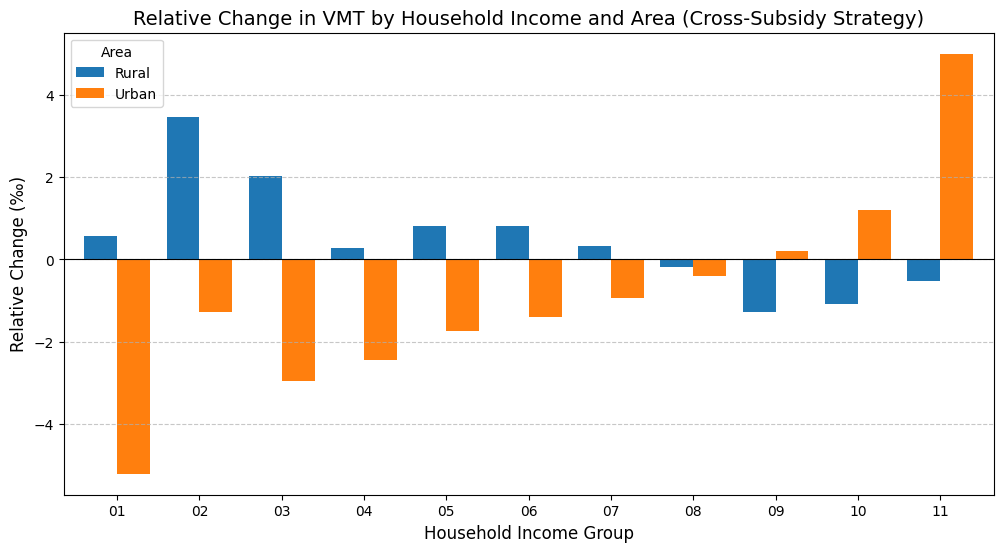

Average Rural Household VMT Change: 0.44 ‰


In [ ]:
import matplotlib.pyplot as plt

# Aggregate VMT at household level to calculate household-level relative change
df_hh_agg = df_vehpub_cleaned.groupby('HOUSEID').agg({
    'VMT': 'sum',
    'VMT_new': 'sum',
    'INC': 'first',
    'AREA': 'first'
}).reset_index()

# Calculate relative VMT change in permille (‰)
# Handle division by zero if any VMT is 0 (unlikely given cleaning, but safe to check)
df_hh_agg['Change_VMT_Permille'] = ((df_hh_agg['VMT_new'] - df_hh_agg['VMT']) / df_hh_agg['VMT']) * 1000

# Pivot for plotting: Average change by Income Group and Area
df_plot = df_hh_agg.groupby(['INC', 'AREA'])['Change_VMT_Permille'].mean().unstack()

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))
df_plot.plot(kind='bar', ax=ax, width=0.8)

plt.title('Relative Change in VMT by Household Income and Area (Cross-Subsidy Strategy)', fontsize=14)
plt.xlabel('Household Income Group', fontsize=12)
plt.ylabel('Relative Change (‰)', fontsize=12)
plt.axhline(0, color='black', linewidth=0.8)
plt.legend(title='Area')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Calculate overall average change for Rural households to support the summary
avg_rural_change = df_hh_agg[df_hh_agg['AREA'] == 'Rural']['Change_VMT_Permille'].mean()
print(f"Average Rural Household VMT Change: {avg_rural_change:.2f} ‰")

In [ ]:
df_vehpub_cleaned.to_csv('/content/drive/MyDrive/CE 252 project/code/2017 Survey/Strategy3_CPM.csv', index=False)

In [ ]:
df_vehpub_cleaned

,HOUSEID,VEHID,FUELTYPE,VEHTYPE,VMT,INC,HHSTATE,HHSTFIPS,W,U,...,CPM_old,CPM_new,Delta_CPM,VMT_RATE_CROSS_SUBSIDY,Relative Delta CPM,Income_Value,ln_INC,elasticity,Relative_VMT_Change,VMT_new
0,30000041,1,3,1,6000,11,CA,6,2,1,...,0.073400,0.085188,0.011788,0.021048,0.160599,400000,12.899220,0.222247,0.035693,6214.155535
1,30000041,2,3,1,12000,11,CA,6,2,1,...,0.076458,0.087860,0.011402,0.021048,0.149128,400000,12.899220,0.222247,0.033143,12397.720263
2,30000085,1,1,4,1500,09,CA,6,1,1,...,0.244667,0.234848,-0.009819,0.021048,-0.040131,137500,11.831379,0.012950,-0.000520,1499.220435
3,30000085,2,1,3,600,09,CA,6,1,1,...,0.159565,0.160483,0.000918,0.021048,0.005750,137500,11.831379,0.012950,0.000074,600.044679
4,30000227,2,1,4,400,06,CA,6,0,1,...,0.229375,0.221485,-0.007890,0.021048,-0.034396,67500,11.119883,-0.126503,0.004351,401.740473
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37667,40794179,1,2,4,18000,06,CA,6,0,1,...,0.305833,0.288298,-0.017535,0.021048,-0.057336,67500,11.119883,-0.126503,0.007253,18130.558091
37668,40794233,1,1,4,8000,08,CA,6,2,1,...,0.229375,0.221485,-0.007890,0.021048,-0.034396,112500,11.630709,-0.026381,0.000907,8007.259220
37669,40794233,2,1,1,10000,08,CA,6,2,1,...,0.159565,0.160483,0.000918,0.021048,0.005750,112500,11.630709,-0.026381,-0.000152,9998.483071
37670,40794233,3,1,1,5000,08,CA,6,2,1,...,0.282308,0.267740,-0.014567,0.021048,-0.051601,112500,11.630709,-0.026381,0.001361,5006.806503
